In [47]:
#Oppgave 1
from scipy.optimize import fsolve
import numpy as np

#Definerer verdi for g som en global variabel
g=9.81

def f(t,alfa,v0,y):
    """Funksjonen definerer likningen f(t)=0 for å finne tiden før legemet treffer bakken.
    Input:
    t: Tid, avhengig variabel [s]
    Parametre:
    alfa: Utskytingsvinkel med horisontalen [radianer]
    v0: Startfart [m/s]
    y: Posisjon når legemet treffer bakken [m] (NB: y < 0 pga. positiv retning oppover)
    """
    return -0.5*g*t**2+v0*np.sin(alfa)*t-y

def horisontal_rekkevidde(alfa,v0,y):
    """Funksjonen beregner den horisontale rekkevidden [m], for et gitt sett av input.
    Input: 
    alfa: Utskytingsvinkel med horisontalen [grader]
    v0: Startfart [m/s]
    y: Starthøyde over bakken [m] (NB: y <= 0 pga. positiv retning oppover)

    Output:
    Horisontal rekkevidde, dvs. horisontal avstand utgangspunkt-nedslagspunkt [m]
    """
    alfa=np.radians(alfa) #Konverterer vinkel til radianer
    #print(alfa,y)
    if (alfa>0):
        #print("l1")
        t_start=2*v0*np.sin(alfa)/g #Startverdi for t tilsvarer at y = 0 (skytes fra bakkenivå)
    elif (alfa==0 and y<0):
        #print("l2")
        t_start=(2*(-y)/g)**0.5
    else:
        #print("l3")
        t_start=1
    
    #t_start=2  
    t=fsolve(f,t_start,(alfa,v0,y)) #Angir (alfa,v0,y) som parametre til funksjonen f
    return v0*np.cos(alfa)*t  #Returnerer horisontal rekkevidde
    

#Definerer verdier for kastet
alfa=20 #Utgangsvinkel
v0=20 #Startfart
y=-9 #Starthøyde over bakkenivå. NB! y < 0 pga. positiv retning oppover

print(horisontal_rekkevidde(alfa,v0,y))

[41.73731072]


In [ ]:
#Oppgave 1a)
from scipy.optimize import fsolve
import numpy as np

#Definerer verdi for g som en global variabel
g=9.81

def f(t,alfa,v0,y):
    """Funksjonen definerer likningen f(t)=0 for å finne tiden før legemet treffer bakken.
    Input:
    t: Tid, avhengig variabel [s]
    Parametre:
    alfa: Utskytingsvinkel med horisontalen [radianer]
    v0: Startfart [m/s]
    y: Posisjon når legemet treffer bakken [m] (NB: y < 0 pga. positiv retning oppover)
    """
    return -0.5*g*t**2+v0*np.sin(alfa)*t-y

def horisontal_rekkevidde(alfa,v0,y):
    """Funksjonen beregner den horisontale rekkevidden [m], for et gitt sett av input.
    Input: 
    alfa: Utskytingsvinkel med horisontalen [grader]
    v0: Startfart [m/s]
    y: Starthøyde over bakken [m] (NB: y <= 0 pga. positiv retning oppover)

    Output:
    Horisontal rekkevidde, dvs. horisontal avstand utgangspunkt-nedslagspunkt [m]
    """
    alfa=np.radians(alfa) #Konverterer vinkel til radianer
    t_start=1 #Startverdi/gjetning for t i fsolve
    #Beregner falltiden t. Vi leter etter løsninger for t, slik at alfa,v0,y er
    #parametre/gitte verdier til funksjonen f. Syntaksen (alfa,v0,y) angir at
    #f skal betraktes som en funksjon av t; ikke av alfa,v0,y.
    t=fsolve(f,t_start,(alfa,v0,y)) #Falltiden t
    return ?  #Returnerer horisontal rekkevidde

#Definerer verdier for kastet
alfa=30 #Utgangsvinkel i grader
v0=7 #Startfart i m/s
y=0 #Starthøyde i m over bakkenivå. NB! y <= 0 pga. positiv retning oppover

print(horisontal_rekkevidde(alfa,v0,y))

In [ ]:
#Oppgave 1b)
#Beregner startverdi/gjetning for t avhengig av v0 og y
if (alfa>0):
    t_start=2*v0*np.sin(alfa)/g #Startverdi for t lik falltid for y = 0
elif (alfa==0 and y<0):
    t_start=? #Startverdi for t lik falltid for vertikalt fall fra samme starthøyde
else:
    t_start=1

In [ ]:
#Oppgave 1c
def alfa_maks(v0,y):
    vinkler=np.linspace(0,90,1000) #array med vinkler
    horisontal_rekkevidde_vektorisert=np.vectorize(horisontal_rekkevidde) #vektoriserer funksjonen
    rekkevidde=horisontal_rekkevidde_vektorisert(vinkler,v0,y) #beregner rekkevidde for alle vinkler i array
    indeks=? #henter ut indeks for maksimal verdi i array
    alfa_maks=vinkler[indeks] #henter ut vinkel for maksimal rekkevidde
    return alfa_maks

#Beregner maksimal rekkevidde for gitte verdier av v0 og y
v0=7
y=-9
print(alfa_maks(v0,y))

In [1]:
#Oppgave 2a
def f(alfa,x,y,v0):
    """Funksjonen definerer likningen f(alfa)=0 som bestemmer vinkel alfa som gir treff i (x,y).
    Input:
    alfa: Startvinkel, avhengig variabel [grader]
    Parametre:
    x: x-koordinat til blinken
    y: y-koordinat til blinken [m]. NB! y < 0 for valgt positiv retning
    v0: Startfart [m/s]
    """
    g=9.81
    alfa=np.radians(alfa) #konverterer x til radianer
    return y+0.5*g*x**2/(v0**2*(np.cos(alfa))**2) -x*np.tan(alfa)

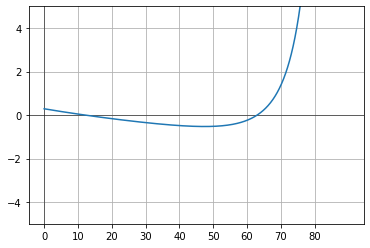

In [2]:
#Oppgave 2b
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

#Definerer verdier for x, y og v0
x=1.5
y=-0.4
v0=4.0

#Definerer array med verdier for vinklene i intervallet [0,90]
vinkler=np.linspace(0,90,1000)

#Funksjonsverdiene som skal plottes er f(vinkler)
verdier=f(vinkler,x,y,v0)

#Definerer egenskapene til grafen som skal tegnes
plt.ylim(-5,5) #Nedre og øvre y-verdi
plt.xticks(np.arange(0,90,10)) #Definerer skala på x-aksen
plt.grid('major') #Tegner inn rutenett
plt.axhline(0, color='black', linewidth=.5) #Tegner inn horisontal x-akse
plt.axvline(0, color='black', linewidth=.5) #Tegner inn vertikal y-akse
plt.plot(vinkler,verdier) #Plotter f som funksjon av alfa
plt.show() #Tegn plott


In [5]:
#Oppgave 2c
from scipy.optimize import fsolve
import numpy as np

#Definerer verdier for x, y og v0
x=1.5
y=-0.4
v0=4.0
alfa0=10

losning=fsolve(f,alfa0,(x,y,v0))
print(losning)

[12.09521032]


In [2]:
#Oppgave 3b
import numpy as np
import scipy.integrate as integrate

def v(t):
    """Funksjonen beregner bilens fart v(t).
    Input: 
    t: tid [s]
    
    Output:
    bilens fart [m/s]
    """
    return 20*np.arctan(0.85*t)


def P(t):
    """Funksjonen beregner effekten produsert av luftmotstanden ved fart v(t).
    Input: 
    t: tid [s]
    
    Output: 
    effekt [W]
    """
    k=5.0 #Verdi for k [Ns^2/m^2]
    return k*v(t)**3

def W(t0,t1,m):
    """Funksjonen beregner det totale arbeidet utført på bilen fra t=t0 til t=t1.
    Input:
    t0: starttid [s]
    t1: sluttid [s]
    m: bilens masse [kg]

    Output: Totalt arbeid utført på bilen i tidsrommet [kJ]
    """
    W_f=integrate.quad(P,t0,t1)[0] #Arbeid utført av luftmotstanden
    W_k=0.5*m*(v(t1)**2-v(t0)**2) #Arbeid for å endre kinetisk energi
    return (W_f+W_k)/1000

print(W(0,10,2000))

1665.2425741749796


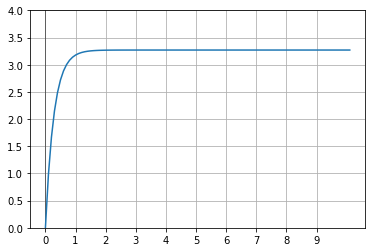

In [1]:
#Oppgave 4b
import numpy as np
import matplotlib.pyplot as plt

def dvdt(v):
    #Beregner akselerasjonen a=dv/dt for legemet som funksjon av farten v
    g=9.81 #Tyngdeakselerasjonen
    m=1.0E-3 #Legemets masse
    k=3.0E-3 #Verdien av konstanten k
    return g-(k/m)*v #Returnerer akselerasjonen a(v)

def v(t0,t1,dt,v0=0):
    
    #Initialiserer t og v
    t=t0
    v=v0

    #Initialiserer lister
    t_liste=[t0]
    v_liste=[v0]
    
    while(t<t1):
        v=v+dvdt(v)*dt
        t=t+dt
        v_liste.append(v)
        t_liste.append(t)
    return t_liste,v_liste

t_liste,v_liste=v(0,10,0.1)

#print(t_liste)
#print(v_liste)
#plt.plot(t,v)
plt.ylim(0,4) #Nedre og øvre y-verdi
plt.xticks(np.arange(0,10,1)) #Definerer skala på x-aksen
plt.grid('major') #Tegner inn rutenett
plt.axhline(0, color='black', linewidth=.5) #Tegner inn horisontal x-akse
plt.axvline(0, color='black', linewidth=.5) #Tegner inn vertikal y-akse
plt.plot(t_liste,v_liste) #Plotter f som funksjon av alfa
plt.show() #Tegn plott